In [2]:
from sympy import *
import numpy as np

In [3]:
import numpy as np
from scipy.integrate import quad

# Define the first segment of the integrand
def integrand_1(theta):
    return 8*0.03*(2*np.cos(theta) - 1) * (np.cos(theta) - 1)

# Define the second segment of the integrand
def integrand_2(theta):
    return (8/9)*0.03*(2*np.cos(theta) - 1) * (np.cos(theta) - 1)

# Integrate over the two segments
theta_split = np.pi/3
a1, err1 = quad(integrand_1, 0, theta_split)
a2, err2 = quad(integrand_2, theta_split, np.pi)

# Compute the final result
alpha_L0 = -(a1 + a2) / np.pi

# Output the result in radians and degrees
print(f"Zero-lift angle of attack (alpha_L0): {alpha_L0:.6f} radians")
print(f"Zero-lift angle of attack (alpha_L0): {np.degrees(alpha_L0):.6f} degrees")

Zero-lift angle of attack (alpha_L0): -0.048535 radians
Zero-lift angle of attack (alpha_L0): -2.780823 degrees


In [4]:
import numpy as np
from scipy.integrate import quad

# Define the first segment of the integrand
def integrand_1(theta):
    return 0.125 * (-0.2 + np.cos(theta)) * (np.cos(theta) - 1)

# Define the second segment of the integrand
def integrand_2(theta):
    return 0.05555 * (-0.2 + np.cos(theta)) * (np.cos(theta) - 1)

# Integrate over the two segments
theta_split = np.arccos(0.2)  # Point where x/c = 0.4
a1, err1 = quad(integrand_1, 0, theta_split)
a2, err2 = quad(integrand_2, theta_split, np.pi)

# Compute the final result
alpha_L0 = -(a1 + a2) / np.pi

# Output the result in radians and degrees
print(f"Zero-lift angle of attack (alpha_L0): {alpha_L0:.6f} radians")
print(f"Zero-lift angle of attack (alpha_L0): {np.degrees(alpha_L0):.6f} degrees")


Zero-lift angle of attack (alpha_L0): -0.036251 radians
Zero-lift angle of attack (alpha_L0): -2.077006 degrees


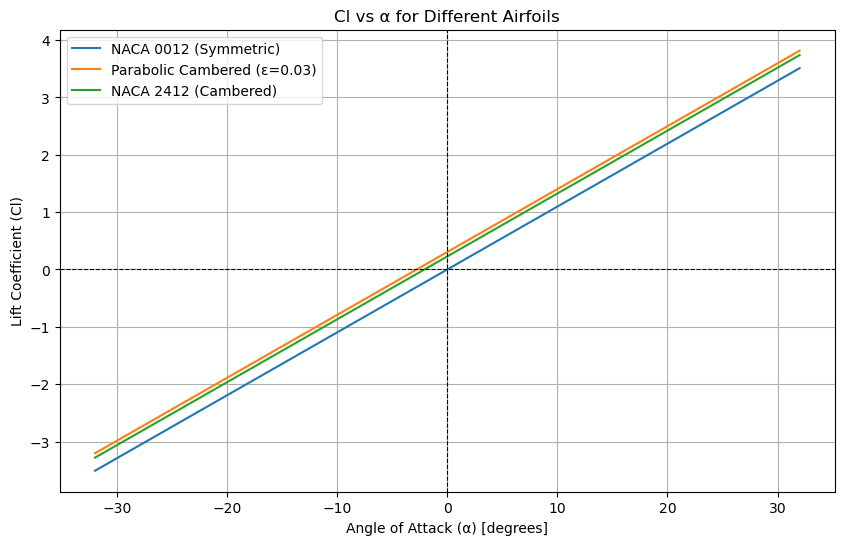

In [5]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.linspace(-32, 32, 10)

# Calculate Cl for the given airfoils
Cl_0012 = 2 * np.pi * np.radians(alpha)
Cl_parabolic = 2 * np.pi * ((np.radians(alpha) - 0.66*0.03) + 4.558*.03/2)
Cl_2412 = 2*np.pi * ((np.radians(alpha) - 0.0044929) + 0.081495/2)

# Plot the updated Cl-alpha curves
plt.figure(figsize=(10, 6))
plt.plot(alpha, Cl_0012, label="NACA 0012 (Symmetric)")
plt.plot(alpha, Cl_parabolic, label="Parabolic Cambered (ε=0.03)")
plt.plot(alpha, Cl_2412, label="NACA 2412 (Cambered)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Angle of Attack (α) [degrees]")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Cl vs α for Different Airfoils")
plt.legend()
plt.grid(True)
plt.show()

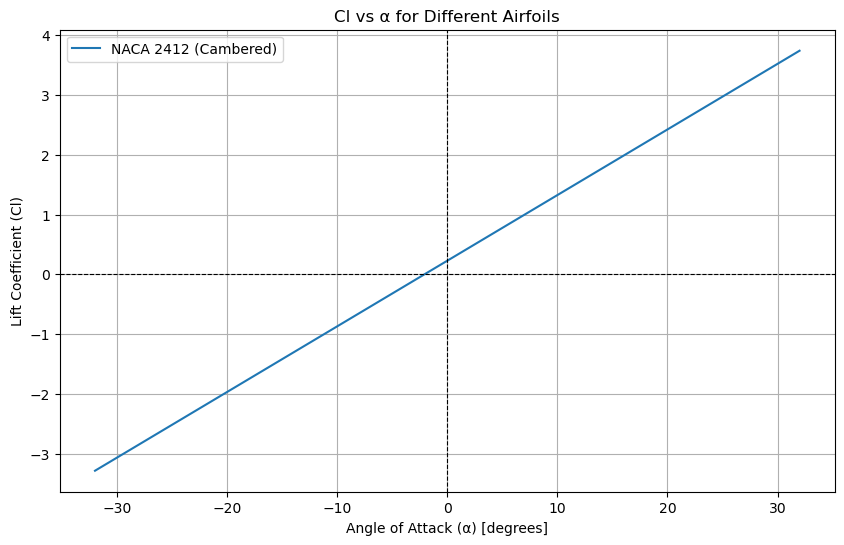

In [6]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.linspace(-32, 32, 50)

# Calculate Cl for the given airfoils
Cl_0012 = 2 * np.pi * np.radians(alpha)
Cl_parabolic = 2 * np.pi * ((np.radians(alpha) - 0.66*0.3) + 4.558*.03/2)
Cl_2412 = 2*np.pi * ((np.radians(alpha) - 0.0044929) + 0.081495/2)

# Plot the updated Cl-alpha curves
plt.figure(figsize=(10, 6))
# plt.plot(alpha, Cl_0012, label="NACA 0012 (Symmetric)")
# plt.plot(alpha, Cl_parabolic, label="Parabolic Cambered (ε=0.03)")
plt.plot(alpha, Cl_2412, label="NACA 2412 (Cambered)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Angle of Attack (α) [degrees]")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Cl vs α for Different Airfoils")
plt.legend()
plt.grid(True)
plt.show()

Data collected: [(1.0, 1.0), (-8.0, -0.651), (-7.5, -0.5973), (-7.0, -0.5421), (-6.5, -0.4867)]


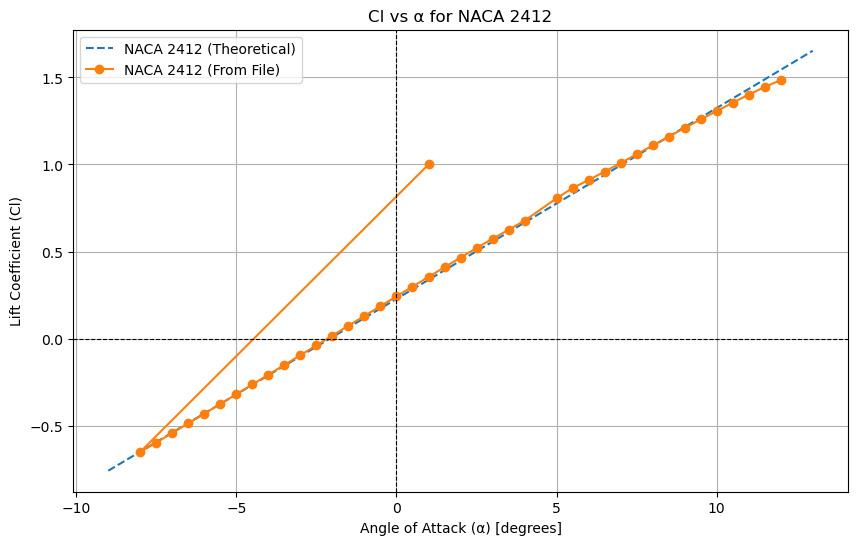

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Provided Cl calculation
alpha = np.linspace(-9, 13, 50)
Cl_2412 = 2 * np.pi * ((np.radians(alpha) - 0.0044929) + 0.081495 / 2)

# Specify the file path (assuming it's in the same directory as your notebook)
file_path = "T1_Re3.000_M0.00_N9.0.txt"

# Load the data from the file
data = []
with open(file_path, "r") as file:
    for line in file:
        if line.strip() and not line.startswith("xflr5"):  # Skip lines that start with "xflr5"
            try:
                values = line.split()
                if len(values) >= 2:  # Ensure there are at least two values (alpha, CL)
                    data.append((float(values[0]), float(values[1])))  # Extract alpha and CL
            except (ValueError, IndexError):
                continue

# Debug: Check the first few entries in the data
print("Data collected:", data[:5])

# Convert to numpy arrays if data is not empty
if data:
    file_alpha, file_CL = zip(*data)
    file_alpha = np.array(file_alpha)
    file_CL = np.array(file_CL)

    # Plot the Cl-alpha curves
    plt.figure(figsize=(10, 6))
    plt.plot(alpha, Cl_2412, label="NACA 2412 (Theoretical)", linestyle="--")
    plt.plot(file_alpha, file_CL, label="NACA 2412 (From File)", marker="o", linestyle="-")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
    plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
    plt.xlabel("Angle of Attack (α) [degrees]")
    plt.ylabel("Lift Coefficient (Cl)")
    plt.title("Cl vs α for NACA 2412")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No valid data found in the file!")


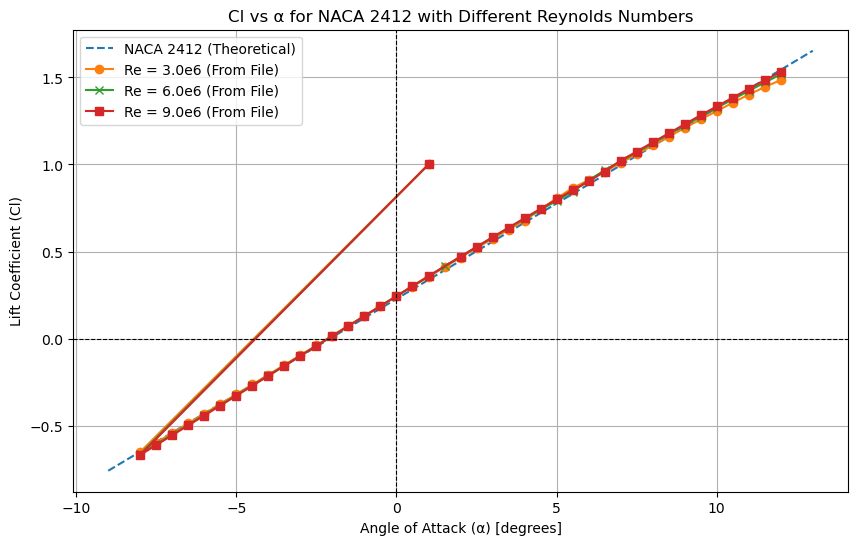

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Provided Cl calculation for NACA 2412
alpha = np.linspace(-9, 13, 50)
Cl_2412 = 2 * np.pi * ((np.radians(alpha) - 0.0044929) + 0.081495 / 2)

# Function to load data from a file
def load_data_from_file(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            if line.strip() and not line.startswith("xflr5"):  # Skip lines with "xflr5"
                try:
                    values = line.split()
                    if len(values) >= 2:  # Ensure there are at least two values
                        data.append((float(values[0]), float(values[1])))  # Extract alpha and CL
                except (ValueError, IndexError):
                    continue
    return data

# Load data from all files (assuming they are in the same directory as the notebook)
data_3e6 = load_data_from_file("T1_Re3.000_M0.00_N9.0.txt")
data_6e6 = load_data_from_file("T1_Re6.000_M0.00_N9.0.txt")
data_9e6 = load_data_from_file("T1_Re9.000_M0.00_N9.0.txt")

# Convert to numpy arrays
file_alpha_3e6, file_CL_3e6 = zip(*data_3e6) if data_3e6 else ([], [])
file_alpha_6e6, file_CL_6e6 = zip(*data_6e6) if data_6e6 else ([], [])
file_alpha_9e6, file_CL_9e6 = zip(*data_9e6) if data_9e6 else ([], [])

file_alpha_3e6 = np.array(file_alpha_3e6)
file_CL_3e6 = np.array(file_CL_3e6)
file_alpha_6e6 = np.array(file_alpha_6e6)
file_CL_6e6 = np.array(file_CL_6e6)
file_alpha_9e6 = np.array(file_alpha_9e6)
file_CL_9e6 = np.array(file_CL_9e6)

# Plot the Cl-alpha curves for all datasets
plt.figure(figsize=(10, 6))
plt.plot(alpha, Cl_2412, label="NACA 2412 (Theoretical)", linestyle="--")

# Plot data from each file
plt.plot(file_alpha_3e6, file_CL_3e6, label="Re = 3.0e6 (From File)", marker="o", linestyle="-")
plt.plot(file_alpha_6e6, file_CL_6e6, label="Re = 6.0e6 (From File)", marker="x", linestyle="-")
plt.plot(file_alpha_9e6, file_CL_9e6, label="Re = 9.0e6 (From File)", marker="s", linestyle="-")

# Additional plot formatting
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Angle of Attack (α) [degrees]")
plt.ylabel("Lift Coefficient (Cl)")
plt.title("Cl vs α for NACA 2412 with Different Reynolds Numbers")
plt.legend()
plt.grid(True)
plt.show()


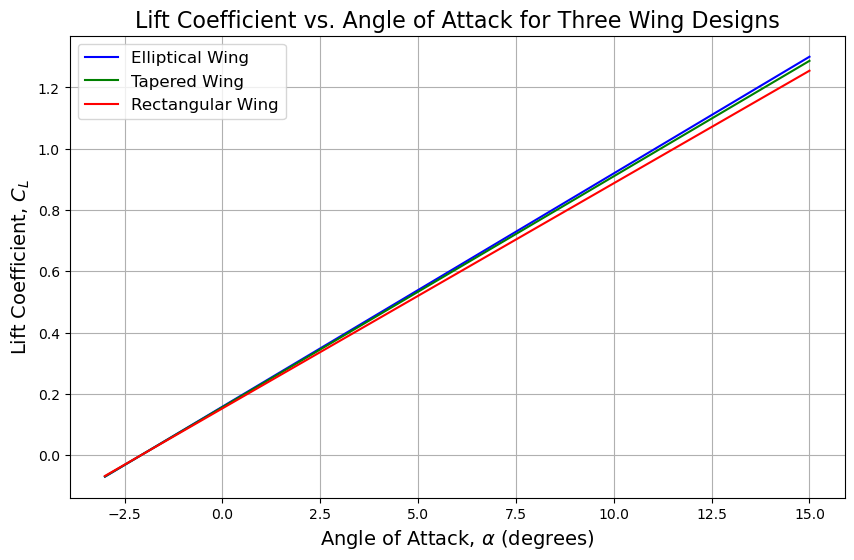

In [9]:
#Cl vs alpha for finite wings

import matplotlib.pyplot as plt
import numpy as np

# Constants
alpha_range = np.linspace(-3, 15, 100)  # Angle of attack range in degrees
alpha_rad = np.radians(alpha_range)  # Convert to radians
alpha_0 = np.radians(-2.077006)

# Compute C_L for each wing
C_L_elliptical = 4.362 * (alpha_rad - alpha_0)
C_L_tapered = 4.317 * (alpha_rad - alpha_0)
C_L_rectangular = 4.209 * (alpha_rad - alpha_0)


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, C_L_elliptical, label='Elliptical Wing', color='blue')
plt.plot(alpha_range, C_L_tapered, label='Tapered Wing', color='green')
plt.plot(alpha_range, C_L_rectangular, label='Rectangular Wing', color='red')

# Labels and legend
plt.xlabel(r'Angle of Attack, $\alpha$ (degrees)', fontsize=14)
plt.ylabel(r'Lift Coefficient, $C_L$', fontsize=14)
plt.title('Lift Coefficient vs. Angle of Attack for Three Wing Designs', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

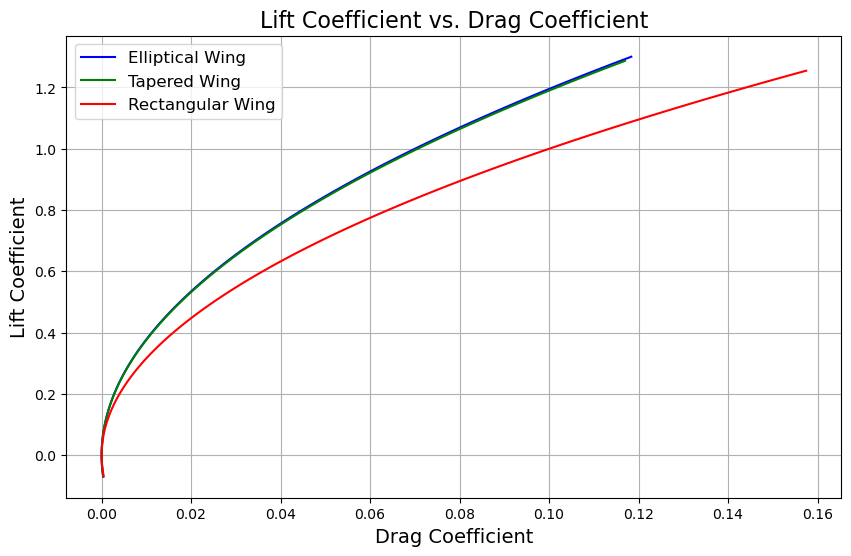

In [10]:
alpha_range = np.linspace(-3, 15, 100)  # Angle of attack range in degrees
alpha_rad = np.radians(alpha_range)  # Convert to radians
alpha_0 = np.radians(-2.077006)

C_L_elliptical = 4.362 * (alpha_rad - alpha_0)
C_L_tapered = 4.317 * (alpha_rad - alpha_0)
C_L_rectangular = 4.209 * (alpha_rad - alpha_0)

C_D_elliptical = C_L_elliptical**2 / (np.pi * 4.545)
C_D_tapered = C_L_tapered**2 / (np.pi * 4.545) * (1 + 0.00891)
C_D_rectangular = C_L_rectangular**2 / (np.pi * 4.545 * 0.7)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(C_D_elliptical, C_L_elliptical, label='Elliptical Wing', color='blue')
plt.plot(C_D_tapered,C_L_tapered , label='Tapered Wing', color='green')
plt.plot(C_D_rectangular,C_L_rectangular , label='Rectangular Wing', color='red')

# Labels and legend
plt.xlabel(r'Drag Coefficient', fontsize=14)
plt.ylabel(r'Lift Coefficient', fontsize=14)
plt.title('Lift Coefficient vs. Drag Coefficient', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

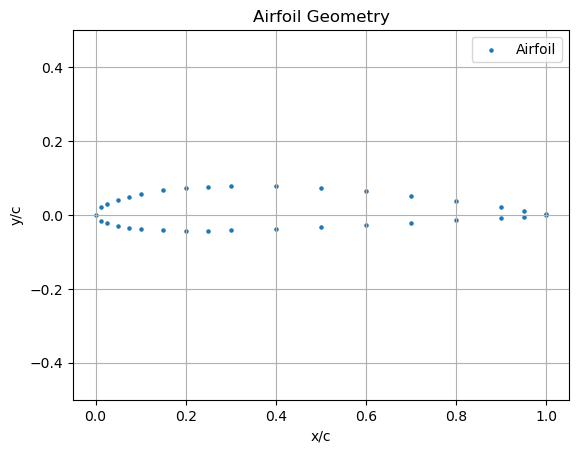

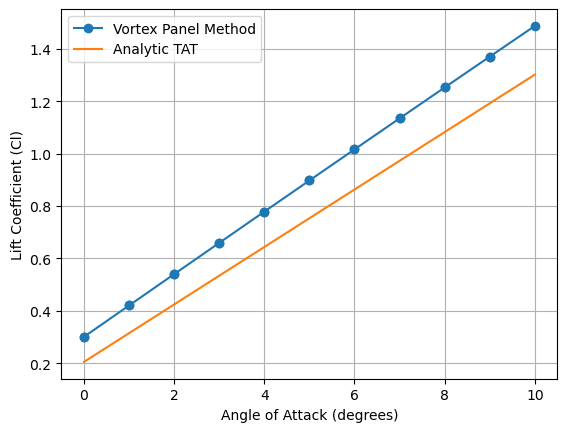

In [11]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# Function to compute differences in an array
def diff(x):
    return x[1:] - x[:-1]

# Load airfoil geometry and normalize
coords = np.loadtxt("naca2412.csv", delimiter=",", dtype=np.float32)
x = coords[:, 0] / np.max(coords[:, 0])  # Normalize x by the chord length
y = coords[:, 1] / np.max(coords[:, 0])  # Normalize y

# Separate the upper and lower surfaces
x_upper = np.flip(x[:x.shape[0] // 2 + 1])
x_lower = x[x.shape[0] // 2:]
y_upper = np.flip(y[:x.shape[0] // 2 + 1])
y_lower = y[y.shape[0] // 2:]

plt.figure(0)
plt.scatter(x, y, s=5, label="Airfoil")
plt.ylim([-0.5, 0.5])
plt.xlabel("x/c")
plt.ylabel("y/c")
plt.title("Airfoil Geometry")
plt.legend()
plt.grid()
plt.show()


# Vortex and Control Point Locations
xv_upper = (3/4) * x_upper[:-1] + (1/4) * x_upper[1:]  # Vortex points
yv_upper = (3/4) * y_upper[:-1] + (1/4) * y_upper[1:]

xv_lower = (3/4) * x_lower[:-1] + (1/4) * x_lower[1:]
yv_lower = (3/4) * y_lower[:-1] + (1/4) * y_lower[1:]

xc_upper = (1/4) * x_upper[:-1] + (3/4) * x_upper[1:]  # Control points
yc_upper = (1/4) * y_upper[:-1] + (3/4) * y_upper[1:]

xc_lower = (1/4) * x_lower[:-1] + (3/4) * x_lower[1:]
yc_lower = (1/4) * y_lower[:-1] + (3/4) * y_lower[1:]

# Combine upper and lower surfaces
xv = np.concatenate((xv_upper, xv_lower))
yv = np.concatenate((yv_upper, yv_lower))
xc = np.concatenate((xc_upper, xc_lower))
yc = np.concatenate((yc_upper, yc_lower))

# Panel lengths and angles
L_upper = np.sqrt(diff(x_upper)**2 + diff(y_upper)**2)
L_lower = np.sqrt(diff(x_lower)**2 + diff(y_lower)**2)
L = np.concatenate((L_upper, L_lower))

theta_p_upper = np.arctan2(diff(y_upper), diff(x_upper))
theta_p_lower = np.arctan2(diff(y_lower), diff(x_lower))
theta_p = np.concatenate((theta_p_upper, theta_p_lower))

# Angles of attack
alpha_vals = np.linspace(0, 10, 21, dtype=np.intc)
Cl_vals = np.ones(alpha_vals.shape[0])

# Iterate over angles of attack
for i in range(alpha_vals.shape[0]):
    alpha = alpha_vals[i]
    alpha_rad = alpha / 180 * np.pi  # Angle of attack in radians

    # Influence Coefficient Matrix
    A = np.zeros((len(xv), len(xv)))
    for p in range(len(xv)):
        for q in range(len(xv)):
            R = np.sqrt((xv[q] - xc[p])**2 + (yv[q] - yc[p])**2)
            cos_d2pq = (xv[q] - xc[p]) / R
            sin_d2pq = (yv[q] - yc[p]) / R
            cos_thetap = np.cos(theta_p[p])
            sin_thetap = np.sin(theta_p[p])
            numerator = -(cos_d2pq * cos_thetap + sin_d2pq * sin_thetap)  # Adjusted sign
            denominator = 2 * np.pi * R
            A[p, q] = numerator / denominator

    # Boundary Condition Vector
    B = np.zeros(len(xv))
    for p in range(len(xv)):
        B[p] = np.sin(alpha_rad - theta_p[p])  # Corrected sign

    # Solve for Vortex Strengths
    Gamma = la.solve(A, B)

    # Compute Lift Coefficient (Cl)
    Cl_vals[i] = 2 * np.sum(Gamma)

# Thin Airfoil Theory (TAT) for Comparison
alpha_vals_rad = alpha_vals * np.pi / 180
Cl_tat = 2 * np.pi * (alpha_vals_rad + 0.0326)  # TAT formula

# Plot results
plt.figure(1)
plt.plot(alpha_vals, Cl_vals, label="Vortex Panel Method", marker='o')
plt.plot(alpha_vals, Cl_tat, label="Analytic TAT")
plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (Cl)")
plt.legend()
plt.grid()
plt.show()

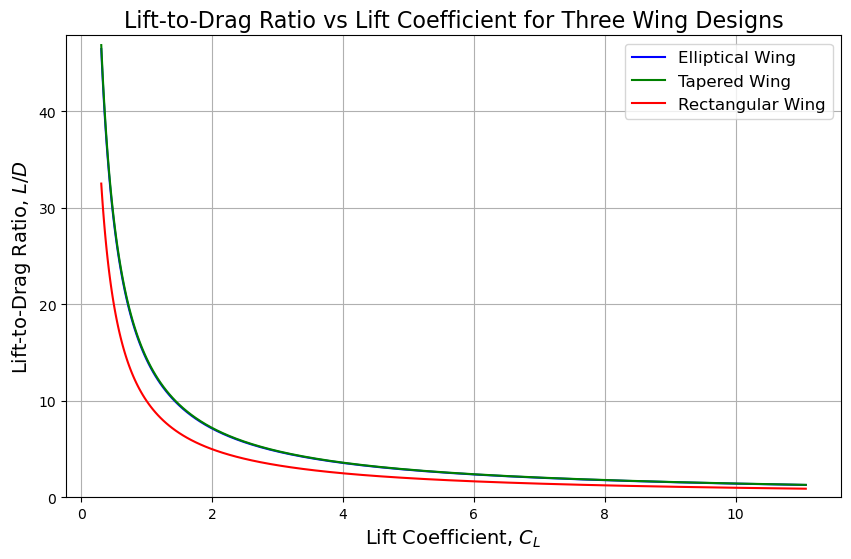

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
rho = 1.225  # Air density in kg/m^3
W = 60.822   # Weight in N
g = 9.81     # Acceleration due to gravity in m/s^2
S = 0.88     # Wing area in m^2
AR = 4.545   # Aspect ratio for all wings
alpha_0 = np.radians(-2.077)  # Zero-lift angle of attack in radians
a = 4.362    # Slope of C_L for finite wings
delta_tapered = 0.00891  # Induced drag correction for tapered wing
e_rectangular = 0.7  # Efficiency factor for rectangular wing

# Compute the range of velocities (assuming different values for V)
V_range = np.linspace(10, 60, 100)  # Airspeed range in m/s
C_L_values = (2 * W * g) / (rho * V_range**2 * S)  # Lift coefficient for each V

# Calculate Induced Drag Coefficient for each wing type
C_D_elliptical = (C_L_values**2) / (np.pi * AR)
C_D_tapered = (C_L_values**2) / (np.pi * AR * (1 + delta_tapered))
C_D_rectangular = (C_L_values**2) / (np.pi * AR * e_rectangular)

# Calculate Lift-to-Drag ratios for each wing design
L_D_elliptical = C_L_values / C_D_elliptical
L_D_tapered = C_L_values / C_D_tapered
L_D_rectangular = C_L_values / C_D_rectangular

# Plotting the Lift-to-Drag Ratio vs Lift Coefficient for each wing design
plt.figure(figsize=(10, 6))
plt.plot(C_L_values, L_D_elliptical, label='Elliptical Wing', color='blue')
plt.plot(C_L_values, L_D_tapered, label='Tapered Wing', color='green')
plt.plot(C_L_values, L_D_rectangular, label='Rectangular Wing', color='red')

# Labels and legend
plt.xlabel(r'Lift Coefficient, $C_L$', fontsize=14)
plt.ylabel(r'Lift-to-Drag Ratio, $L/D$', fontsize=14)
plt.title('Lift-to-Drag Ratio vs Lift Coefficient for Three Wing Designs', fontsize=16)
plt.legend(fontsize=12)

# Set y-axis limits to show only positive values
plt.ylim(0, np.max([L_D_elliptical.max(), L_D_tapered.max(), L_D_rectangular.max()]) + 1)

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


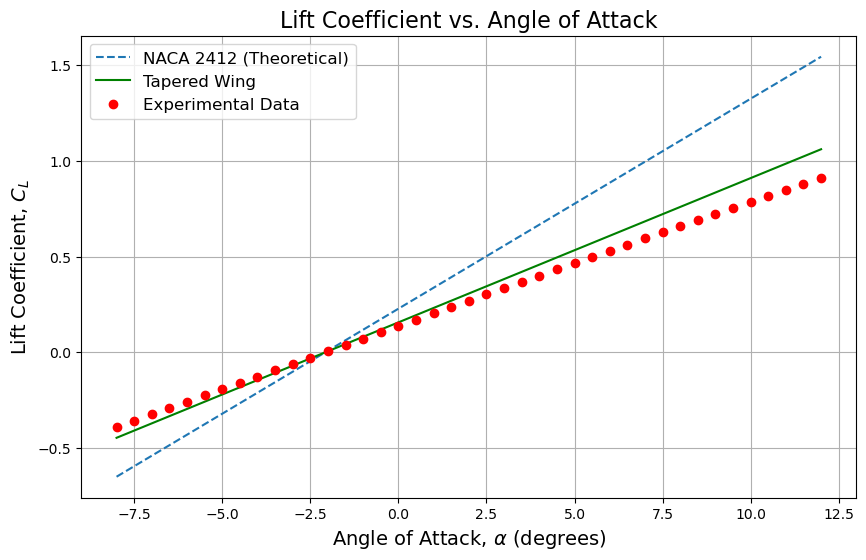

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Constants for theoretical computations
alpha_range = np.linspace(-8, 12, 100)  # Angle of attack range in degrees
alpha_rad = np.radians(alpha_range)  # Convert to radians
alpha_0 = np.radians(-2.077006)

# Compute C_L for each wing
Cl_2412 = 2 * np.pi * ((alpha_rad - 0.0044929) + 0.081495 / 2)
C_L_tapered = 4.317 * (alpha_rad - alpha_0)

# Read data from the text file
file_name = "T1-10_0 m_s-Panel-Inviscid_CL_vs_Alpha.txt"  # Updated file path
alpha_data = []
cl_data = []

# Load data from the file
with open(file_name, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Skip header and empty lines
        if line.strip() and not line.startswith(("alpha", "Plane", "Polar", "Freestream")):
            columns = line.split()
            try:
                alpha_data.append(float(columns[0]))  # First column is alpha
                cl_data.append(float(columns[2]))    # Third column is C_L
            except (IndexError, ValueError):
                continue  # Skip lines that can't be parsed

# Convert to NumPy arrays for easier handling
alpha_data = np.array(alpha_data)
cl_data = np.array(cl_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(alpha_range, Cl_2412, label="NACA 2412 (Theoretical)", linestyle="--")
plt.plot(alpha_range, C_L_tapered, label="Tapered Wing", color="green")
plt.plot(alpha_data, cl_data, label="Experimental Data", marker="o", linestyle="none", color="red")

# Labels and legend
plt.xlabel(r"Angle of Attack, $\alpha$ (degrees)", fontsize=14)
plt.ylabel(r"Lift Coefficient, $C_L$", fontsize=14)
plt.title("Lift Coefficient vs. Angle of Attack", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


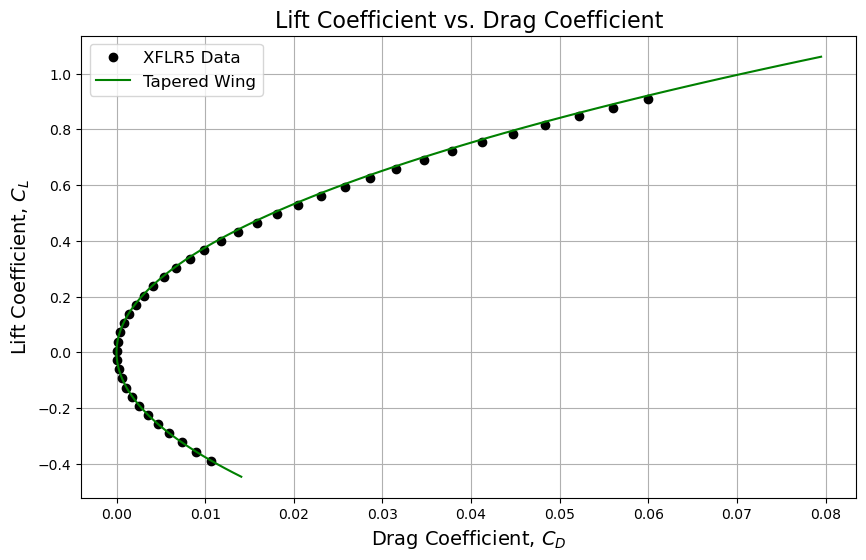

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Constants for the induced drag coefficient
delta_tapered = 0.00891  # Non-ellipticity factor for tapered wing
AR = 4.545               # Aspect ratio

# Read XFLR5 data
file_name = "T1-10_0 m_s-Panel-Inviscid_CLvsCD.txt"  # Updated file path
cl_data = []
cd_data = []

# Load data from the file
with open(file_name, 'r') as file:
    lines = file.readlines()
    for line in lines:
        # Skip header and empty lines
        if line.strip() and not line.startswith(("Plane", "Polar", "Freestream", "CL")):
            columns = line.split()
            try:
                cl_data.append(float(columns[2]))  # Third column: C_L
                cd_data.append(float(columns[5]))  # Sixth column: C_D
            except (IndexError, ValueError):
                continue  # Skip lines that can't be parsed

# Convert to NumPy arrays
cl_data = np.array(cl_data)
cd_data = np.array(cd_data)

# Compute theoretical lift and drag coefficients for each wing
alpha_range = np.linspace(-8, 12, 100)  # Angle of attack range in degrees
alpha_rad = np.radians(alpha_range)  # Convert to radians
alpha_0 = np.radians(-2.077006)

C_L_tapered = 4.317 * (alpha_rad - alpha_0)
C_D_tapered = C_L_tapered**2 / (np.pi * AR) * (1 + delta_tapered)

# Plotting
plt.figure(figsize=(10, 6))

# Plot XFLR5 data
plt.plot(cd_data, cl_data, label="XFLR5 Data", marker="o", linestyle="none", color="black")

# Plot theoretical data for tapered wing
plt.plot(C_D_tapered, C_L_tapered, label='Tapered Wing', color='green')

# Labels and legend
plt.xlabel(r'Drag Coefficient, $C_D$', fontsize=14)
plt.ylabel(r'Lift Coefficient, $C_L$', fontsize=14)
plt.title('Lift Coefficient vs. Drag Coefficient', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()
